# Anomaly detection 
## eli belkind 208250431
## itamar almog  208196600

the imports for the project:

In [46]:
import pandas as pa
import numpy as np
from matplotlib import pyplot as plt  
from sklearn.ensemble import IsolationForest
import seaborn as sns
sns.set()

I combined the anomaly data with its' label data form to get a data form with all the needed values 

In [47]:
data_file = 'C:/Users/elobl/PycharmProjects/anomaly/conn250K.csv'
correction_file = 'C:/Users/elobl/PycharmProjects/anomaly/conn250K_anomaly.csv'
expected = pa.read_csv(correction_file, names=['id','type'])
data = pa.read_csv(data_file, names=['id','duration','src','dst'])
df = data.set_index('id').join(expected.set_index('id'))
df.describe()

,duration,src,dst,type
count,256670.000000,256670.000000,2.566700e+05,256670.000000
mean,0.640936,474.247898,4.473533e+03,0.003982
std,15.627170,3391.106084,2.080903e+04,0.062976
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,217.000000,6.600000e+02,0.000000
50%,0.000000,249.000000,1.661000e+03,0.000000
75%,0.000000,306.000000,4.341000e+03,0.000000
max,3289.000000,54540.000000,7.068759e+06,1.000000


In [48]:
df[df['type'] == 1].describe()

,duration,src,dst,type
count,1022.000000,1022.000000,1022.000000,1022.0
mean,0.165362,53830.551859,8186.319961,1.0
std,1.298328,5024.887083,791.334919,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,54540.000000,8314.000000,1.0
50%,0.000000,54540.000000,8314.000000,1.0
75%,0.000000,54540.000000,8314.000000,1.0
max,14.000000,54540.000000,8315.000000,1.0


In [49]:
norm = df[df['type'] == 0]
norm.describe()

,duration,src,dst,type
count,255648.000000,255648.000000,2.556480e+05,255648.0
mean,0.642837,260.946239,4.458690e+03,0.0
std,15.658131,134.910464,2.084920e+04,0.0
min,0.000000,0.000000,0.000000e+00,0.0
25%,0.000000,217.000000,6.590000e+02,0.0
50%,0.000000,249.000000,1.651000e+03,0.0
75%,0.000000,306.000000,4.256000e+03,0.0
max,3289.000000,54540.000000,7.068759e+06,0.0


from the descriptions, it can be seen that the anomalic point tend to gravitate to specific values and regions compared
to normal points.
the destination bytes mostly clump around the 8000 mark.
the src bytes tend to clump around 50000 make.
the duration tend to low on avarege but it is seem that this feature alone is gives little indication
of an anomaly because of his spread, it is likly that the duration has some coralation with the other features
for finding anomalies or his effect on anomly finding is very minimal.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='duration', ylabel='src'>

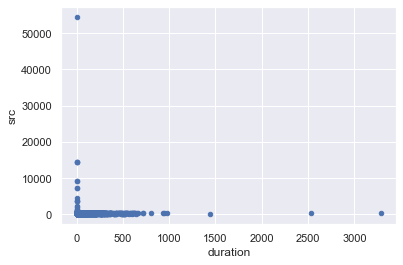

In [25]:
graph = pa.concat([norm['duration'], norm['src']], axis=1)
graph.plot.scatter(x='duration', y='src')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='duration', ylabel='src'>

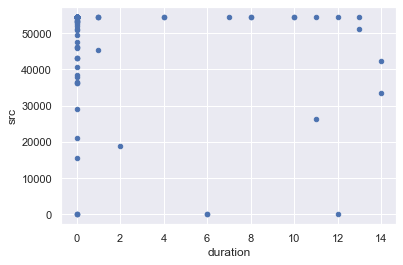

In [26]:
anom = df[df['type'] == 1]
graph = pa.concat([anom['duration'], anom['src']], axis=1)
graph.plot.scatter(x='duration', y='src')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='duration', ylabel='dst'>

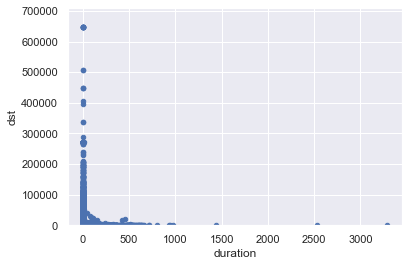

In [27]:
graph = pa.concat([norm['duration'], norm['dst']], axis=1)
graph.plot.scatter(x='duration', y='dst', ylim=(0,710000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='duration', ylabel='dst'>

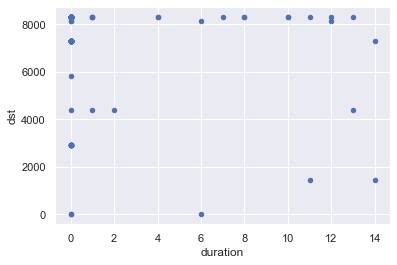

In [28]:
graph = pa.concat([anom['duration'], anom['dst']], axis=1)
graph.plot.scatter(x='duration', y='dst')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='src', ylabel='dst'>

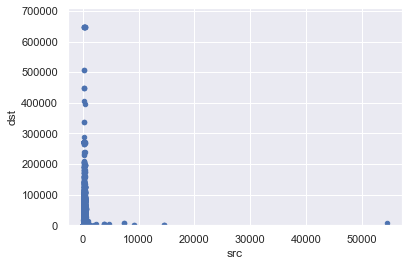

In [29]:
graph = pa.concat([norm['src'], norm['dst']], axis=1)
graph.plot.scatter(x='src', y='dst', ylim=(0,710000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='src', ylabel='dst'>

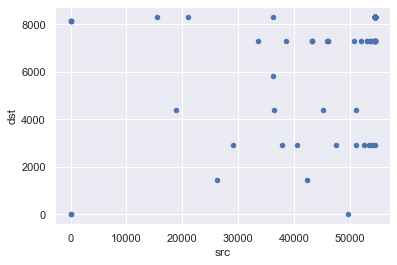

In [30]:
graph = pa.concat([anom['src'], anom['dst']], axis=1)
graph.plot.scatter(x='src', y='dst')

<AxesSubplot:>

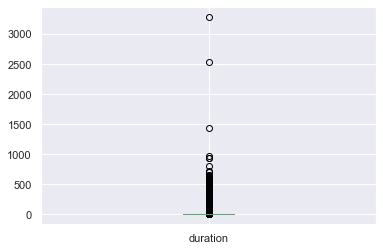

In [31]:
data['duration'].plot(kind='box')

<AxesSubplot:>

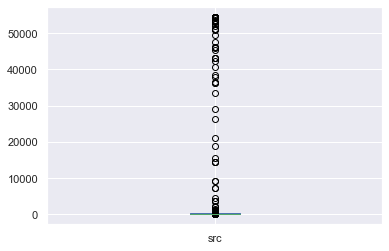

In [32]:
data['src'].plot(kind='box')

<AxesSubplot:>

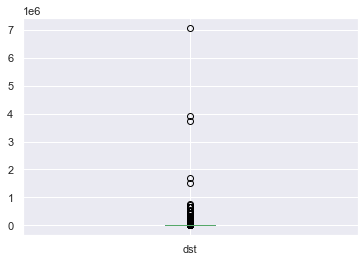

In [33]:
data['dst'].plot(kind='box')

from the graphs we infered that high src byte has the best cororaltion to being an anomaly,
with src to duration graph is able to single out anomilies in the high right corner of the graphs.

In [15]:
print(len(df[(df['duration'] == 0) & (df['dst'] == 0) & (df['src'] == 0) & (df['type'] == 0)]),
len(df[(df['duration'] == 0) & (df['dst'] == 0) & (df['src'] == 0) & (df['type'] == 1)]))

126 1


in the anomilal graphs i noticed a point located in 0,0,0, whitch is a strange value for a point.
after investigation it is seem that there are a lot of point in the same location whitch are normal.
i took this inconsidiration as if the machine learning algorithm will desingante them as normal
it will be imposible to determine this one anominal point and future points as anominal with out additinal features.

In [34]:
df_array = np.array(df)
df_calc = df_array[:,[0,1,2]]

for this project we will be using isolation forest for its' high precision rates and robust nature
compared to other known machine learning algorithms.
as we know the amount of anomalies we can use an optimal value for the contamination variable for this algorithm.

In [35]:
def predict(df_calc):
    iso_forest = IsolationForest(n_estimators=300, contamination=0.0041)
    iso_forest = iso_forest.fit(df_calc)
    return iso_forest.predict(df_calc)
iso_forest_values = predict(df_calc)
df[iso_forest_values == -1]

,duration,src,dst,type
id,,,,
1302,0,166,265995,0
1315,0,150,265995,0
26041,0,516,53744,0
28111,0,161,142716,0
36440,0,178,171136,0
...,...,...,...,...
239775,0,339,197192,0
242459,0,194,269232,0
246160,0,179,273544,0


In [36]:
def result(df, isof_outliers):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i, line in df[isof_outliers==-1].iterrows():
        if line['type'] == 1:
            tp = tp + 1
        else:
            fp = fp + 1
    for i, line in df[isof_outliers!=-1].iterrows():
        if line['type'] == 0:
            tn = tn + 1
        else:
            fn = fn + 1
    accuracy = (tp + tn) / len(df)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return accuracy, precision, recall
print(result(df, iso_forest_values))

(0.9996298749366891, 0.9401709401709402, 0.9686888454011742)


In [38]:
def multi_predict(runs, df_calc, expected):
    if runs == 1:
        return result(df, predict(df_calc))
    anomalies = pa.read_csv(correction_file, names=['id','type'])
    for i in range(0, len(anomalies)):
        anomalies.iloc[i][1] = 0
    for i in range(0,runs):
        isof_outliers = predict(df_calc)
        for i in anomalies[isof_outliers==-1].index:
            anomalies.iloc[i]['type'] = anomalies.iloc[i]['type'] + 1
    tp = 0
    fp = 0
    tn = 0
    fn = 0    
    for i in range(0, len(expected)):
        if anomalies.iloc[i]['type'] > runs*0.7:
            if expected.iloc[i]['type'] == 1:
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if expected.iloc[i]['type'] == 0:
                tn = tn + 1
            else:
                fn = fn + 1
    accuracy = (tp + tn) / len(df)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return accuracy, precision, recall
print(multi_predict(10, df_calc, expected))

In [20]:
df_calc = df_array[:,[0,1]]
print(multi_predict(10, df_calc, expected))

(0.9998675341878677, 0.9731800766283525, 0.9941291585127201)


# Answers